In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

# Data Preparation

In [2]:
class_name = 'Occupancy'
df_training = pd.read_csv('training.csv', skipinitialspace=True, na_values='?', keep_default_na=True)
df_test = pd.read_csv('test.csv', skipinitialspace=True, na_values='?', keep_default_na=True)


columns2remove = ['date', 'Unnamed: 0', 'cumulative_hour', 'cumulative_minute', 'day', 'weekend', 'day_minute', 'minute', 'hour']
df_training.drop(columns2remove, inplace=True, axis=1)
df_test.drop(columns2remove, inplace=True, axis=1)
df_training.head()

attributes = [col for col in df_training.columns if col != class_name]

X_train = df_training[attributes].values
y_train = df_training[class_name]

X_test = df_test[attributes].values
y_test = df_test[class_name]

#Unisco training e test perche' fra un po' Guidotti usa X e y, numpy array prima dello split
frames = [df_training, df_test]

result = pd.concat(frames)

attributes = [col for col in df_training.columns if col != class_name]
X = result[attributes].values
y = result[class_name]

feature_names = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

# Data Partitioning

In [3]:
df_training.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
X_train.shape

(14392, 5)

In [6]:
np.sqrt(5)

2.23606797749979

# Random Forest

In [7]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [8]:
#import pickle
#pickle.dump(clf, 'filename.pickle')
#clf = pickle.load('filename.pickle')

In [9]:
#max_features = 'auto'
clf1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9831387808041504
F1-score [0.98964143 0.95470383]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.91      1.00      0.95      1097

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168



In [10]:
result = permutation_importance(clf1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
result

{'importances_mean': array([-1.07003891e-03, -2.91828794e-04,  2.83933204e-01, -2.59403372e-04,
        -9.24124514e-04]),
 'importances_std': array([0.00029183, 0.00017462, 0.00434613, 0.00018054, 0.0003481 ]),
 'importances': array([[-9.72762646e-04, -9.72762646e-04, -8.10635538e-04,
         -1.29701686e-03, -6.48508431e-04, -9.72762646e-04,
         -8.10635538e-04, -1.62127108e-03, -1.13488975e-03,
         -1.45914397e-03],
        [-1.62127108e-04, -3.24254215e-04, -1.62127108e-04,
         -3.24254215e-04, -1.62127108e-04, -3.24254215e-04,
         -6.48508431e-04, -3.24254215e-04,  0.00000000e+00,
         -4.86381323e-04],
        [ 2.92639429e-01,  2.85830091e-01,  2.84208820e-01,
          2.84533074e-01,  2.86964981e-01,  2.79831388e-01,
          2.79669261e-01,  2.87451362e-01,  2.77399481e-01,
          2.80804150e-01],
        [-1.62127108e-04, -3.24254215e-04, -1.62127108e-04,
         -4.86381323e-04,  0.00000000e+00, -6.48508431e-04,
         -3.24254215e-04, -1.621

In [11]:
#classification_report(y_test, y_pred, output_dict=True)

In [12]:
#import json
#json.dumps(classification_report(y_test, y_pred, output_dict=True))

In [13]:
#json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

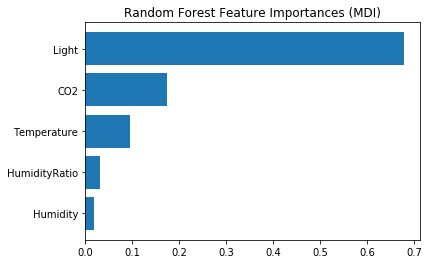

In [14]:
nbr_features = 15

tree_feature_importances = clf1.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

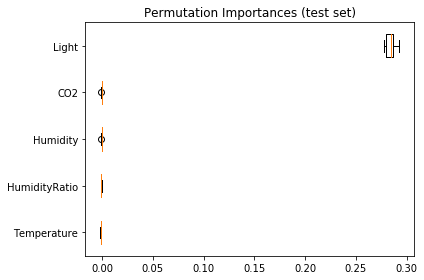

In [15]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [16]:
import pydotplus
from sklearn import tree
from IPython.display import Image
import os

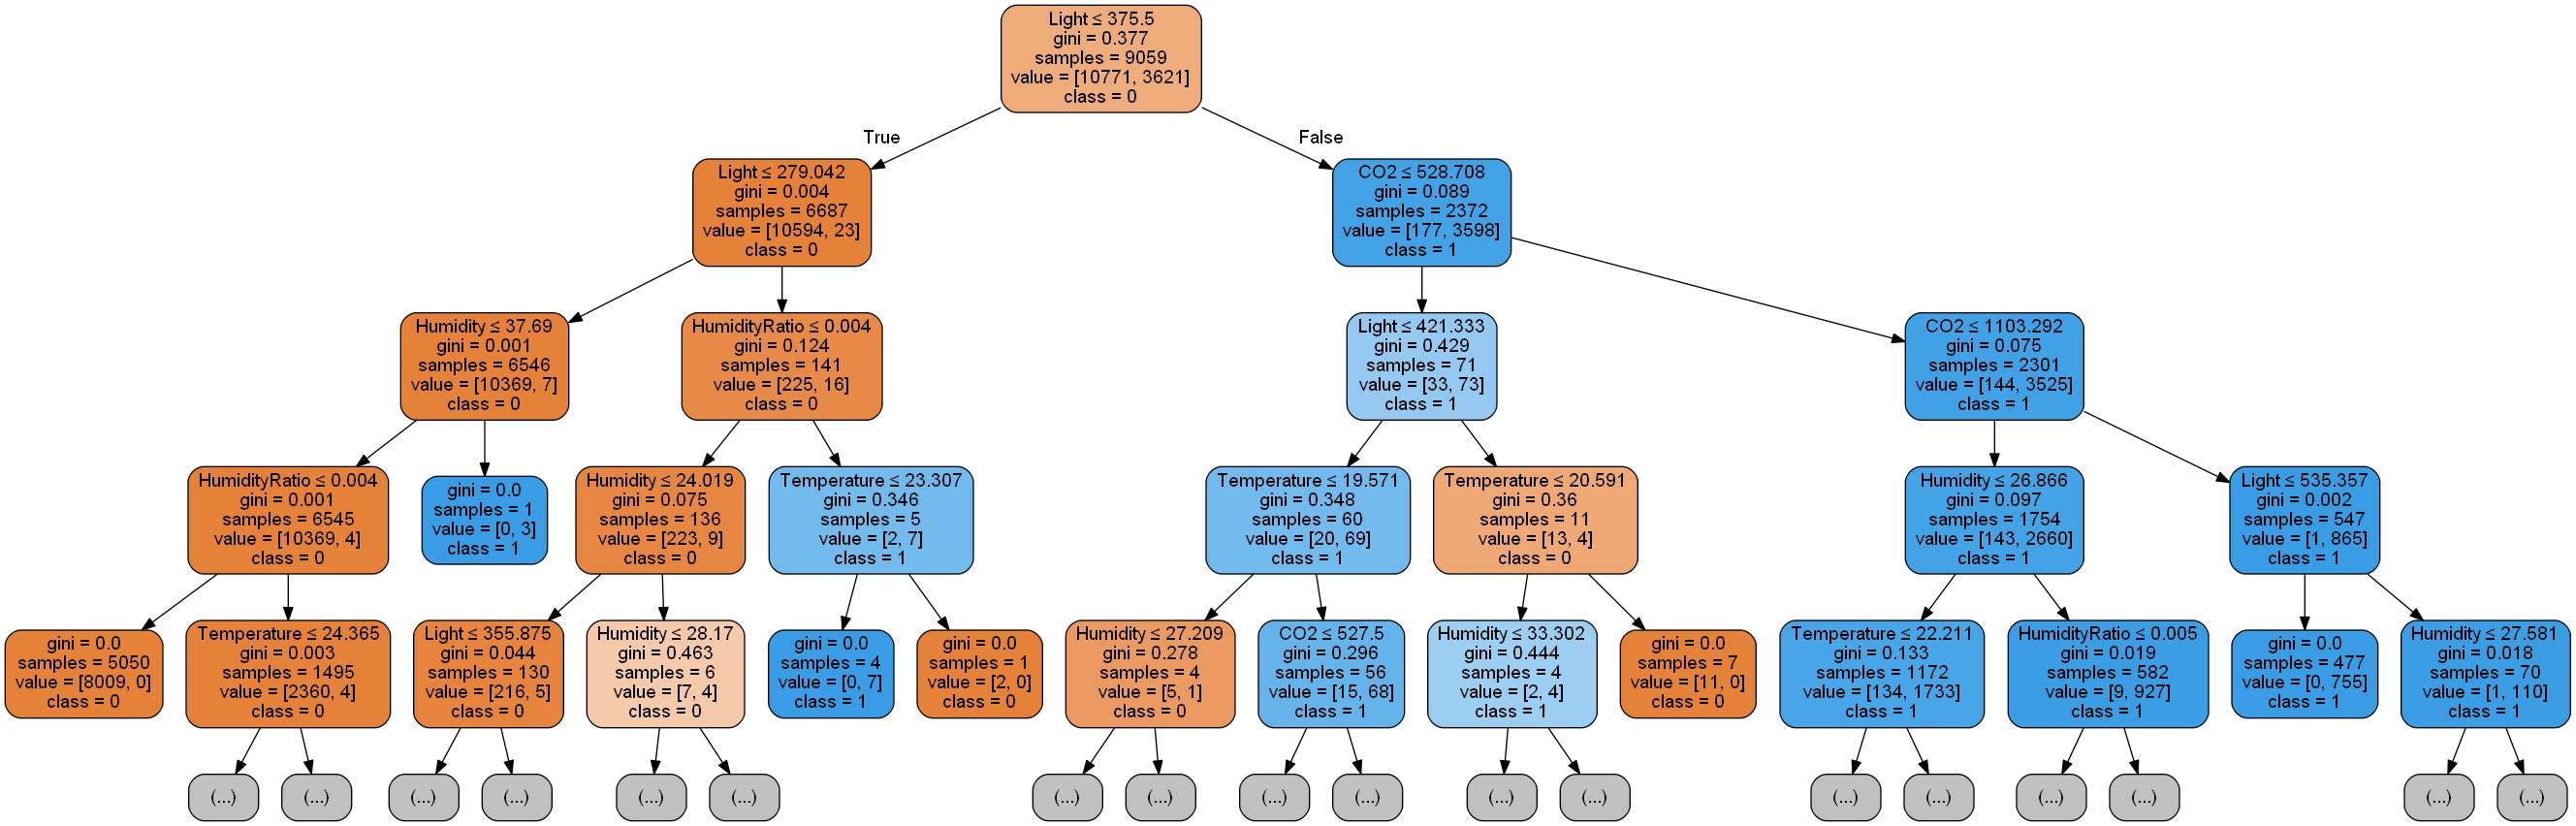

In [17]:
os.environ['PATH'] += os.pathsep + 'C:/Users/dalla/Anaconda3/Library/bin/graphviz'

dot_data = tree.export_graphviz(clf1.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

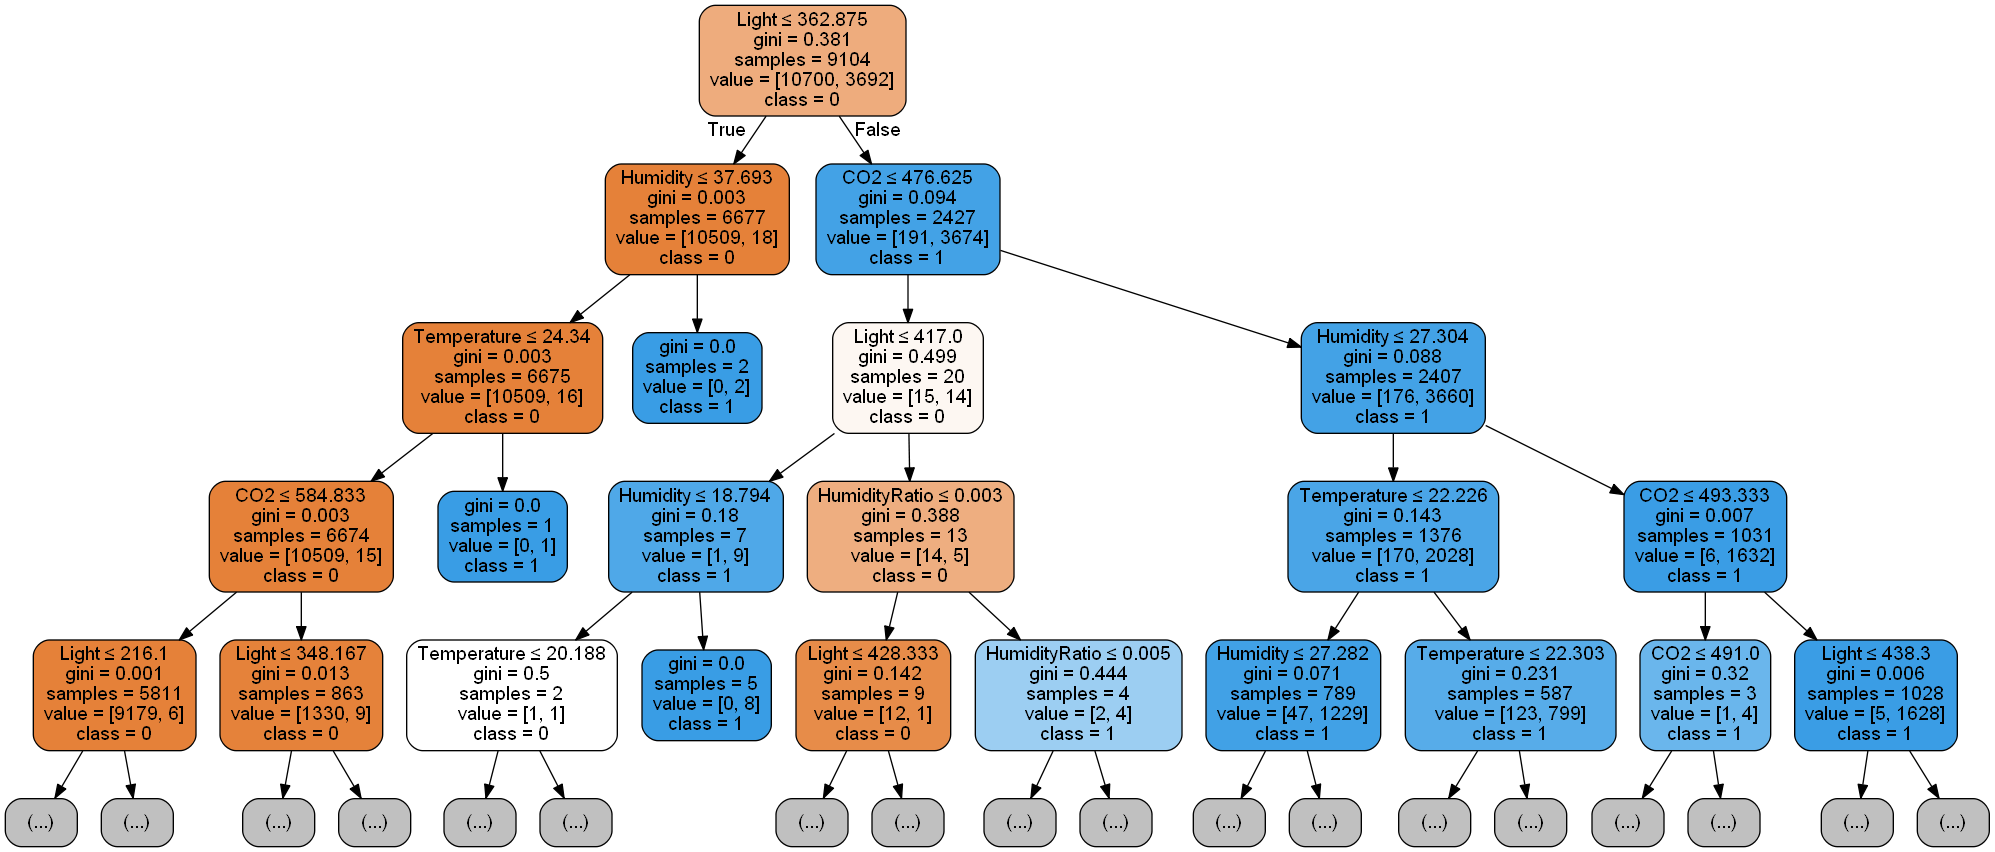

In [18]:
dot_data = tree.export_graphviz(clf1.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Proviamo altri modelli cambiando le configurazioni dei parametri

In [19]:
#max_features = 4
clf2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9842736705577172
F1-score [0.99034538 0.95762342]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.92      1.00      0.96      1097

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.99      0.98      0.98      6168



In [20]:
#max_features = log2
clf3 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9831387808041504
F1-score [0.98964143 0.95470383]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.91      1.00      0.95      1097

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168



In [21]:
#max_depth = 4
#max_features = 'log2'
clf4 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9941634241245136
F1-score [0.99643987 0.98381295]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.97      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       0.99      0.99      0.99      6168



### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
clf5 = RandomForestClassifier()
scores = cross_val_score(clf5, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.952 +/- 0.028


### Tuning the hyper-parameters

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [25]:
%%time

param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf5, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf5_grid = grid_search.best_estimator_

y_pred = clf5_grid.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.99189364461738
F1-score [0.99504852 0.97765862]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.96      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Wall time: 1min 38s


In [26]:
%%time

param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf5, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf5_random = random_search.best_estimator_


y_pred = clf5_random.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.995136186770428
F1-score [0.99703499 0.9864743 ]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           1.00      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      1.00      1.00      6168

Wall time: 2min 22s


In [27]:
%%time

param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [10, 20, 30, 50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'max_features' : ['auto', 'log2', 'None'] + list(np.arange(1, 4))
             }

grid_search = GridSearchCV(clf5, param_grid=param_list, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
clf6_grid = grid_search.best_estimator_

y_pred = clf6_grid.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
print("precision:", report['1']['precision'])

Accuracy 0.993514915693904
F1-score [0.99604274 0.98204668]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.97      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

precision: 0.9672855879752431
Wall time: 2h 4min 49s


In [28]:
clf6_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
%%time
#MI SEMBRA CHE QUESTO SIA IL TOP
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [10, 20, 30, 50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'max_features' : ['auto', 'log2', 'None'] + list(np.arange(1, 4))
             }

random_search = RandomizedSearchCV(clf5, param_distributions=param_list, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)
clf6_random = random_search.best_estimator_


y_pred = clf6_random.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
print("precision:", report['1']['precision'])

Accuracy 0.9944876783398184
F1-score [0.99663832 0.98469847]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.97      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       0.99      0.99      0.99      6168

precision: 0.9724444444444444
Wall time: 2min 46s


In [30]:
clf6_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
#BEST MODEL EVER
clf6_random_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf6_random_best.fit(X_train, y_train)
y_pred = clf6_random_best.predict(X_test)
y_score_rf = clf6_random_best.predict_proba(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict = True)
print("precision [1]:", report['1']['precision'])
print("recall [1]:", report['1']['recall'])

Accuracy 0.995136186770428
F1-score [0.99703499 0.9864743 ]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           1.00      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      1.00      1.00      6168

precision [1]: 0.975914362176628
recall [1]: 0.9972652689152234


In [32]:
#predict su training e stampo classification per vedere se fa overfitting

y_pred_train = clf6_random_best.predict(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred_train))
print('F1-score %s' % f1_score(y_train, y_pred_train, average=None))
print(classification_report(y_train, y_pred_train))

Accuracy 0.9865897720956087
F1-score [0.99095044 0.97411828]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10739
           1       0.95      0.99      0.97      3653

    accuracy                           0.99     14392
   macro avg       0.98      0.99      0.98     14392
weighted avg       0.99      0.99      0.99     14392



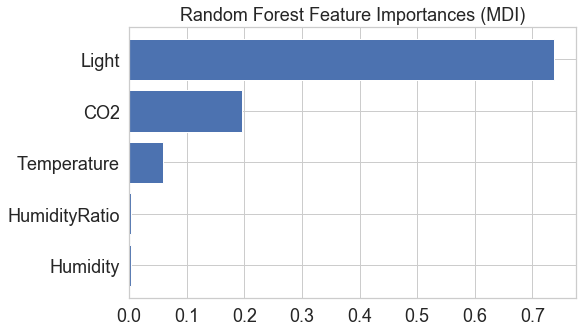

In [33]:
nbr_features = 15

tree_feature_importances = clf6_random_best.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]


y_ticks = np.arange(0, len(sorted_idx))
plt.figure(figsize = (8,5))
sns.set(style='whitegrid')
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

In [34]:
from sklearn.inspection import permutation_importance

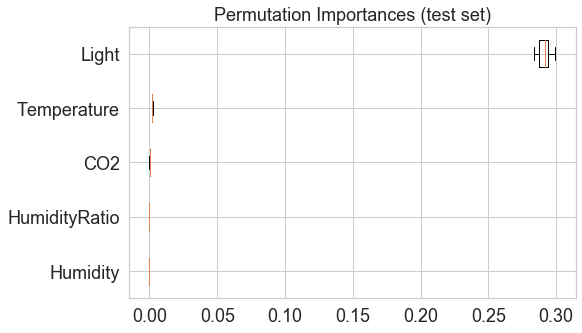

In [35]:
result = permutation_importance(clf6_random_best, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()[-nbr_features:]

plt.figure(figsize = (8,5))
sns.set(style='whitegrid')
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [36]:
clf6_random_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [37]:
#Stampa importanza variabili nel trainig e test

# Bagging

In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [39]:
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn as

In [40]:
%%time
#Primo test (giocattolo) di bagging con un decision tree 


#Decision Tree
clf7 = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf7.fit(X_train, y_train)

y_pred = clf7.predict(X_test)
y_score_bag = clf7.predict_proba(X_test)

fpr_bag, tpr_bag, _ = roc_curve(y_test, y_score_bag[:, 1])
roc_auc_bag = auc(fpr_bag, tpr_bag)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9836251621271076
F1-score [0.98994725 0.95587593]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.92      1.00      0.96      1097

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168

Wall time: 5.49 s


In [42]:
%%time
#Test di bagging su un SVC (giocattolo)

clf8 = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf8.fit(X_train, y_train)

y_pred = clf8.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9863813229571985
F1-score [0.99165176 0.96306069]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.93      1.00      0.96      1097

    accuracy                           0.99      6168
   macro avg       0.96      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168

Wall time: 6.08 s


In [43]:
%%time

clf9 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf9.fit(X_train, y_train)

y_pred = clf9.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9865434500648509
F1-score [0.9917536  0.96345222]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.93      1.00      0.96      1097

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168

Wall time: 1min 5s


In [44]:
%%time

clf10 = BaggingClassifier(base_estimator=clf6_random, n_estimators=100, random_state=0, n_jobs=-1)
clf10.fit(X_train, y_train)

y_pred = clf10.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict = True)
print("precision [1]:", report['1']['precision'])
print("recall [1]:", report['1']['recall'])

Accuracy 0.9944876783398184
F1-score [0.99663832 0.98469847]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.97      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       0.99      0.99      0.99      6168

precision [1]: 0.9724444444444444
recall [1]: 0.9972652689152234
Wall time: 27.3 s


In [46]:
%%time
#Qua facciamo il bagging sul miglior classificatore trovato usando solo random forest... i risultati non cambiano


clf10_bis = BaggingClassifier(base_estimator=clf6_random_best, n_estimators=100, random_state=0, n_jobs=-1)
clf10_bis.fit(X_train, y_train)

y_pred = clf10_bis.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict = True)
print("precision [1]:", report['1']['precision'])
print("recall [1]:", report['1']['recall'])

Accuracy 0.995136186770428
F1-score [0.99703499 0.9864743 ]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           1.00      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      1.00      1.00      6168

precision [1]: 0.975914362176628
recall [1]: 0.9972652689152234
Wall time: 27 s


In [47]:
%%time

clf11 = BaggingClassifier(base_estimator=clf6_grid, n_estimators=100, random_state=0)
clf11.fit(X_train, y_train)

y_pred = clf11.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9949740596627756
F1-score [0.99693585 0.98602974]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      0.99      0.99      6168

Wall time: 1min 1s


# Boosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [49]:
%%time

clf12 = AdaBoostClassifier(base_estimator=None, n_estimators=10, random_state=0)
clf12.fit(X_train, y_train)

y_pred = clf12.predict(X_test)
y_score_ada = clf12.predict_proba(X_test)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_score_ada[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9948119325551232
F1-score [0.99683669 0.98558559]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.97      1.00      0.99      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Wall time: 140 ms


In [50]:
%%time

clf13B = DecisionTreeClassifier(max_depth=1)
clf13B.fit(X_train, y_train)

y_pred = clf13B.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.995136186770428
F1-score [0.99703499 0.9864743 ]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           1.00      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      1.00      1.00      6168

Wall time: 24 ms


In [51]:
%%time

clf13 = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf13.fit(X_train, y_train)

y_pred = clf13.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9833009079118028
F1-score [0.9897441  0.95508068]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.92      1.00      0.96      1097

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168

Wall time: 1.07 s


# Le celle che seguono impiegano un bel po' di tempo a concludere

In [52]:
%%time
# clf6_random aveva Accuracy 0.995136186770428

clf14 = AdaBoostClassifier(base_estimator=clf6_random, n_estimators=100, random_state=0)
clf14.fit(X_train, y_train)

y_pred = clf14.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9651426718547341
F1-score [0.97834626 0.91067719]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5071
           1       0.84      1.00      0.91      1097

    accuracy                           0.97      6168
   macro avg       0.92      0.98      0.94      6168
weighted avg       0.97      0.97      0.97      6168

Wall time: 1min 42s


In [53]:
%%time
# clf6_grid aveva Accuracy 0.9944876783398184

clf15 = AdaBoostClassifier(base_estimator=clf6_grid, n_estimators=100, random_state=0)
clf15.fit(X_train, y_train)

y_pred = clf15.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9636835278858625
F1-score [0.97741935 0.90728477]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5071
           1       0.83      1.00      0.91      1097

    accuracy                           0.96      6168
   macro avg       0.92      0.98      0.94      6168
weighted avg       0.97      0.96      0.96      6168

Wall time: 1min 33s


In [54]:
#provare a:
# - utilizzare un altro classificatore (Knn, naive, SVM) OK
# - ciclo per vedere performance al variare di n_estimators
# - predict sul training per vedere se fa overfitting (clf6_grif e clf15)

In [55]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=45, weights = 'uniform')
clf16_bis = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=0)
clf16_bis.fit(X_train, y_train)

y_pred = clf16_bis.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9878404669260701
F1-score [0.99255287 0.96688742]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5071
           1       0.94      1.00      0.97      1097

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [56]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse o

In [57]:
%%time
#BAGGING n_estimators = 1000
#Nota: Questi risultati sono uguali a quelli di clf6_random con n_estimators=100

clf16 = BaggingClassifier(base_estimator=clf6_random, n_estimators=1000, random_state=0)
clf16.fit(X_train, y_train)

y_pred = clf16.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# clf6_random aveva Accuracy 0.995136186770428

Accuracy 0.9944876783398184
F1-score [0.99663832 0.98469847]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.97      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Wall time: 9min 22s


In [58]:
#check overfitting
y_pred_train = clf16.predict(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred_train))
print('F1-score %s' % f1_score(y_train, y_pred_train, average=None))
print(classification_report(y_train, y_pred_train))

Accuracy 0.9865897720956087
F1-score [0.99095044 0.97411828]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10739
           1       0.95      0.99      0.97      3653

    accuracy                           0.99     14392
   macro avg       0.98      0.99      0.98     14392
weighted avg       0.99      0.99      0.99     14392



In [59]:
%%time
#BAGGING n_estimators = 1000
#Nota: Questi risultati sono uguali a quelli di clf6_grid :(

clf17 = BaggingClassifier(base_estimator=clf6_grid, n_estimators=1000, random_state=0, n_jobs=-1)
clf17.fit(X_train, y_train)

y_pred = clf17.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# clf6_grid aveva Accuracy 0.9944876783398184

Accuracy 0.9949740596627756
F1-score [0.99693585 0.98602974]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      0.99      0.99      6168

Wall time: 3min 52s


In [60]:
%%time
#BAGGING n_estimators = 1000, random_state = 1
#Non cambia nulla con la cella sopra :(

clf18 = BaggingClassifier(base_estimator=clf6_grid, n_estimators=1000, random_state=1, n_jobs=-1)
clf18.fit(X_train, y_train)

y_pred = clf18.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9949740596627756
F1-score [0.99693585 0.98602974]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      0.99      0.99      6168

Wall time: 3min 30s


In [61]:
%%time
#BAGGING n_estimators = 10000, random_state = 10
#Da confrontare con la cella sopra!

#Voglio rispondermi alle seguenti domande che scrivo qua altrimenti non so perche' sto facendo le cose:
#Ci mette 10 volte il tempo che ci ha messo la cella sopra?
#Cambia Accuracy 0.9944876783398184?

#Non e' cambiato nulla e ci ha messo 2 ore
clf19 = BaggingClassifier(base_estimator=clf6_grid, n_estimators=10000, random_state=10, n_jobs=-1)
clf19.fit(X_train, y_train)

y_pred = clf19.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\dalla\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy 0.9949740596627756
F1-score [0.99693585 0.98602974]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           0.99      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      0.99      0.99      6168

Wall time: 43min 23s


# ROC and Lift Chart

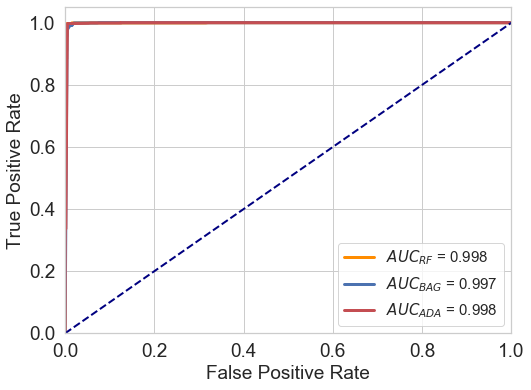

In [62]:
plt.figure(figsize = (8,6))
sns.set(style=('whitegrid'))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=3, label='$AUC_{RF}$ = %.3f' % (roc_auc_rf))
plt.plot(fpr_bag, tpr_bag, color='b', lw=3, label='$AUC_{BAG}$ = %.3f' % (roc_auc_bag))
plt.plot(fpr_ada, tpr_ada, color='r', lw=3, label='$AUC_{ADA}$ = %.3f' % (roc_auc_ada))

f=19
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=f)
plt.ylabel('True Positive Rate', fontsize=f)
plt.legend(loc="lower right", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=f)
plt.show()

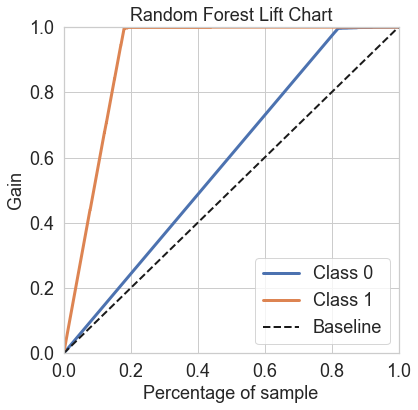

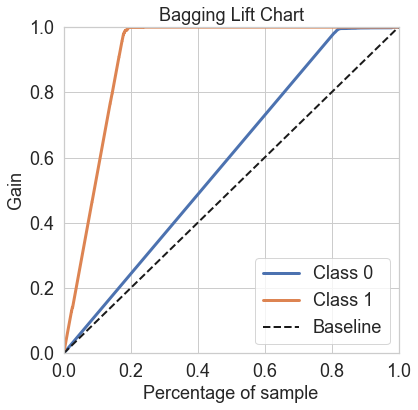

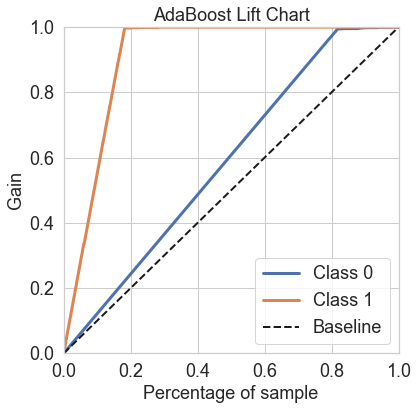

In [63]:
from scikitplot.metrics import plot_cumulative_gain
plot_cumulative_gain(y_test, y_score_rf, title = 'Random Forest Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plot_cumulative_gain(y_test, y_score_bag, title = 'Bagging Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plot_cumulative_gain(y_test, y_score_ada, title = 'AdaBoost Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plt.show()